In [128]:
import numpy as np
import pandas as pd
from datetime import datetime

from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

import requests
import json
from pandas import json_normalize
import seaborn as sns


### Getting the Schema

In [54]:
sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=5,
)
client = Client(
    transport=sample_transport
)

In [55]:
client

In [56]:
sample_transport


### GraphQL query

In [72]:
query = gql(
    """
    query transaction($skip: Int!){
                swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, 
                           orderBy: timestamp, 
                           orderDirection: desc,
                           first:1000, skip:$skip) {
                    id
                    timestamp
                    amount0In
                    amount1In
                    amount0Out
                    amount1Out
                    pair {
                        token0Price
                        token1Price
                        reserveUSD
                        volumeUSD
                    }
                }
                
                mints(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, 
                           orderBy: timestamp, 
                           orderDirection: desc,
                           first:1000, skip:$skip) {
                    id
                    timestamp
                    amount0
                    amount1
                    liquidity
                    amountUSD
                }
                
                burns(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, 
                           orderBy: timestamp, 
                           orderDirection: desc,
                           first:1000, skip:$skip) {
                    id
                    timestamp
                    amount0
                    amount1
                    liquidity
                    amountUSD
                }
            }
"""
)



In [73]:
query

Document(definitions=[OperationDefinition(operation='query', name=Name(value='transaction'), variable_definitions=[VariableDefinition(variable=Variable(name=Name(value='skip')), type=NonNullType(type=NamedType(name=Name(value='Int'))), default_value=None)], directives=[], selection_set=SelectionSet(selections=[Field(alias=None, name=Name(value='swaps'), arguments=[Argument(name=Name(value='where'), value=ObjectValue(fields=[ObjectField(name=Name(value='pair'), value=StringValue(value='0xd3d2e2692501a5c9ca623199d38826e513033a17'))])), Argument(name=Name(value='orderBy'), value=EnumValue(value='timestamp')), Argument(name=Name(value='orderDirection'), value=EnumValue(value='desc')), Argument(name=Name(value='first'), value=IntValue(value='1000')), Argument(name=Name(value='skip'), value=Variable(name=Name(value='skip')))], directives=[], selection_set=SelectionSet(selections=[Field(alias=None, name=Name(value='id'), arguments=[], directives=[], selection_set=None), Field(alias=None, name

### Collecting the Swap, Mint and Burns data
- A swap event is created when tokens are exchanged
- A mint event is created when liquidity tokens are created
- A Burn event is created when liquidity tokens are destroyed

In [77]:
variables = {'skip': 0} # Dictionary of variables that are passed to the query.
swaps = []
mints = []
burns = []
for i in range(0, 2):
    curr = client.execute(query, variables)
    
    swaps += curr["swaps"]
    mints += curr["mints"]
    burns += curr["burns"]
    
    variables["skip"] += 1

In [78]:
swaps

[{'amount0In': '94.343628898954263952',
  'amount0Out': '0',
  'amount1In': '0',
  'amount1Out': '0.824586185274388228',
  'id': '0x580f2b6b8a36eb5dba84e9645914f6faf58e5fc7e47e19368333526f25e24fbc-0',
  'pair': {'reserveUSD': '78048173.91655717411785849502059494',
   'token0Price': '114.0747175545652882300006478968072',
   'token1Price': '0.008766184317061058039107149066615302',
   'volumeUSD': '6633311068.822952552394033756429427'},
  'timestamp': '1624394708'},
 {'amount0In': '21.318526312876253709',
  'amount0Out': '0',
  'amount1In': '0',
  'amount1Out': '0.186338386108218508',
  'id': '0xa746b0d55b835144a6a9381b7fb37c17ed965542b06ef3754fb9ff4c59ada3c8-0',
  'pair': {'reserveUSD': '78048173.91655717411785849502059494',
   'token0Price': '114.0747175545652882300006478968072',
   'token1Price': '0.008766184317061058039107149066615302',
   'volumeUSD': '6633311068.822952552394033756429427'},
  'timestamp': '1624394636'},
 {'amount0In': '8.06320145',
  'amount0Out': '0',
  'amount1In':

In [80]:
mints

[{'amount0': '2.557598085751151773',
  'amount1': '0.022422772306627879',
  'amountUSD': '86.46975507391507921129237196731587',
  'id': '0x12a1ea85b880da3acbc1293f27522a15bfa6e50ebe1c2b04b817089b82e9536a-0',
  'liquidity': '0.115896432589665048',
  'timestamp': '1624394460'},
 {'amount0': '13',
  'amount1': '0.113075773175260046',
  'amountUSD': '429.2800793217744702297724955112811',
  'id': '0x6cdc2d75a0d929c455d26297a25fca27313225177bc58b68f7e7dec977675fb4-0',
  'liquidity': '0.586776204778199217',
  'timestamp': '1624382181'},
 {'amount0': '1329.322039207490637929',
  'amount1': '11.382782115834750414',
  'amountUSD': '42374.89356751667537464247995136193',
  'id': '0x1e7d65ec65b509d843d1c8f99735e5f7902b915c114dfb317ebf01ed50abd069-0',
  'liquidity': '59.533414207872926306',
  'timestamp': '1624377243'},
 {'amount0': '202.363850105958119047',
  'amount1': '1.726035560657461028',
  'amountUSD': '6425.228847284079746985619256756923',
  'id': '0xc592de8acfed48d0e6f38a49cb0b6601ed26f3cc6

In [81]:
burns

[{'amount0': '94.341315369353003929',
  'amount1': '0.827101742615473035',
  'amountUSD': '3187.132152299112066835747697486055',
  'id': '0x58c8cf2547afeac2da515cf25c8e015ec2f41159d2b77156c35ad893b1925592-0',
  'liquidity': '4.275035220756099172',
  'timestamp': '1624394499'},
 {'amount0': '3.993093122182708792',
  'amount1': '0.035008112643335749',
  'amountUSD': '134.567466112228785314658239206823',
  'id': '0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a15df753fb965b4e32447-0',
  'liquidity': '0.180945728488729196',
  'timestamp': '1624393699'},
 {'amount0': '47.921783170252341643',
  'amount1': '0.418166723385187238',
  'amountUSD': '1591.458844744205198197422682530964',
  'id': '0xd43f9f7813b2bb765d43365f737a64d4238d17b276d9780266a835ce66e28764-0',
  'liquidity': '2.166483220659391763',
  'timestamp': '1624385751'},
 {'amount0': '11.026540672599112782',
  'amount1': '0.09621390693577743',
  'amountUSD': '366.1721662433735783763683470798184',
  'id': '0x7bc68b91c9cdd879917e3f08f4c67

### A function to create dataframe from Swap data

In [76]:
def make_dataframe_swaps(List):
    
    columns = ["Timestamp",
           "amount0In",
           "amount0Out",
           "amount1In",
           "amount1Out",
           "Pool_ID",
           "Liquidity",
           "Volume_USD",
           "token0Price",
           "token1Price",]
    data = {}

    for col in columns:
        data[col] = []
    
    for entry in List:
        data[columns[0]] += [datetime.fromtimestamp(int(entry["timestamp"]))]
        data[columns[1]] += [float(entry["amount0In"])]
        data[columns[2]] += [float(entry["amount0Out"])]
        data[columns[3]] += [float(entry["amount1In"])]
        data[columns[4]] += [float(entry["amount1Out"])]
        data[columns[5]] += [entry["id"]]
        data[columns[6]] += [float(entry["pair"]["reserveUSD"])]
        data[columns[7]] += [float(entry["pair"]["volumeUSD"])]
        data[columns[8]] += [float(entry["pair"]["token0Price"])]
        data[columns[9]] += [float(entry["pair"]["token1Price"])]
    
    return pd.DataFrame.from_dict(data)
    

### A function to create dataframe from Mints and Burns

In [85]:
def make_dataframe_mints_and_burns(List, sign):
    
    columns = ["Timestamp",
           "Pool_ID",
           "Base_Currency",
           "Quote_Currency",
           "Volume_USD",
           "Liquidity",
           "Sign"]
    
    data = {}

    for col in columns:
        data[col] = []
    
    for entry in List:
        data[columns[0]] += [datetime.fromtimestamp(int(entry["timestamp"]))]
        data[columns[1]] += [entry["id"]]
        data[columns[2]] += [float(entry["amount0"])]
        data[columns[3]] += [float(entry["amount1"])]
        data[columns[4]] += [float(entry["liquidity"])]
        data[columns[5]] += [float(entry["amountUSD"])]
        data["Sign"] += [sign]
    
    return pd.DataFrame.from_dict(data)

### Getting the Swap Dataset

In [84]:
swaps_dataset = make_dataframe_swaps(swaps)
swaps_dataset

,Timestamp,amount0In,amount0Out,amount1In,amount1Out,Pool_ID,Liquidity,Volume_USD,token0Price,token1Price
0,2021-06-23 02:15:08,94.343629,0.000000,0.000000,0.824586,0x580f2b6b8a36eb5dba84e9645914f6faf58e5fc7e47e...,7.804817e+07,6.633311e+09,114.074718,0.008766
1,2021-06-23 02:13:56,21.318526,0.000000,0.000000,0.186338,0xa746b0d55b835144a6a9381b7fb37c17ed965542b06e...,7.804817e+07,6.633311e+09,114.074718,0.008766
2,2021-06-23 02:13:45,8.063201,0.000000,0.000000,0.070479,0x7f2805a9e24e77811c6f4787a4ea2cb5ff948638d6be...,7.804817e+07,6.633311e+09,114.074718,0.008766
3,2021-06-23 02:00:25,6.000000,0.000000,0.000000,0.052445,0x52c343401a44f387ef3d72faa985bfe1818adbb9dcd1...,7.804817e+07,6.633311e+09,114.074718,0.008766
4,2021-06-23 01:56:04,0.000000,96.835321,0.851490,0.000000,0x873dd72de16d9ad3a79a9c3386c6214fdd0de7d31750...,7.804817e+07,6.633311e+09,114.074718,0.008766
...,...,...,...,...,...,...,...,...,...,...
1995,2021-06-21 01:07:35,3279.281945,0.000000,0.000000,30.075426,0xe6b75220c58f0accff25c46d92220db324d96c93c555...,7.804817e+07,6.633311e+09,114.074718,0.008766
1996,2021-06-21 00:25:33,320.000000,0.000000,0.000000,2.939429,0xe43551021fb98d4e77ae71a15a4e7c7285dfa4b50c04...,7.804817e+07,6.633311e+09,114.074718,0.008766
1997,2021-06-21 00:25:15,0.000000,5.000000,0.046212,0.000000,0x1763740ad9f493acb907bb1c3072428168dfa983963a...,7.804817e+07,6.633311e+09,114.074718,0.008766
1998,2021-06-21 00:22:16,6.959273,0.000000,0.000000,0.063935,0xcf0e3b94668ceb1db27da7fe65cd391125e32c42a02e...,7.804817e+07,6.633311e+09,114.074718,0.008766


In [91]:
swaps_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    2000 non-null   datetime64[ns]
 1   amount0In    2000 non-null   float64       
 2   amount0Out   2000 non-null   float64       
 3   amount1In    2000 non-null   float64       
 4   amount1Out   2000 non-null   float64       
 5   Pool_ID      2000 non-null   object        
 6   Liquidity    2000 non-null   float64       
 7   Volume_USD   2000 non-null   float64       
 8   token0Price  2000 non-null   float64       
 9   token1Price  2000 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 156.4+ KB


### Dividing the swaps as buy/sell
- Buy -> Buy base currency and sell quote currency, side = 1
- Sell ->  Sell base currency and buy quote currency, side = -1

In [94]:
swaps_dataset["Side"] = np.where(swaps_dataset["amount0Out"] > 0.0, 1, -1)
swaps_dataset["Quantity_Base_Currency"] = np.where(swaps_dataset["amount0Out"] > 0.0, swaps_dataset["amount0Out"], 
                                                   swaps_dataset["amount0In"])
swaps_dataset["Quantity_Quote_Currency"] = np.where(swaps_dataset["amount0Out"] > 0.0, swaps_dataset["amount1In"], 
                                                    swaps_dataset["amount1Out"])
swaps_dataset

,Timestamp,amount0In,amount0Out,amount1In,amount1Out,Pool_ID,Liquidity,Volume_USD,token0Price,token1Price,Side,Quantity_Base_Currency,Quantity_Quote_Currency
0,2021-06-23 02:15:08,94.343629,0.000000,0.000000,0.824586,0x580f2b6b8a36eb5dba84e9645914f6faf58e5fc7e47e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,94.343629,0.824586
1,2021-06-23 02:13:56,21.318526,0.000000,0.000000,0.186338,0xa746b0d55b835144a6a9381b7fb37c17ed965542b06e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,21.318526,0.186338
2,2021-06-23 02:13:45,8.063201,0.000000,0.000000,0.070479,0x7f2805a9e24e77811c6f4787a4ea2cb5ff948638d6be...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,8.063201,0.070479
3,2021-06-23 02:00:25,6.000000,0.000000,0.000000,0.052445,0x52c343401a44f387ef3d72faa985bfe1818adbb9dcd1...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,6.000000,0.052445
4,2021-06-23 01:56:04,0.000000,96.835321,0.851490,0.000000,0x873dd72de16d9ad3a79a9c3386c6214fdd0de7d31750...,7.804817e+07,6.633311e+09,114.074718,0.008766,1,96.835321,0.851490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-06-21 01:07:35,3279.281945,0.000000,0.000000,30.075426,0xe6b75220c58f0accff25c46d92220db324d96c93c555...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,3279.281945,30.075426
1996,2021-06-21 00:25:33,320.000000,0.000000,0.000000,2.939429,0xe43551021fb98d4e77ae71a15a4e7c7285dfa4b50c04...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,320.000000,2.939429
1997,2021-06-21 00:25:15,0.000000,5.000000,0.046212,0.000000,0x1763740ad9f493acb907bb1c3072428168dfa983963a...,7.804817e+07,6.633311e+09,114.074718,0.008766,1,5.000000,0.046212
1998,2021-06-21 00:22:16,6.959273,0.000000,0.000000,0.063935,0xcf0e3b94668ceb1db27da7fe65cd391125e32c42a02e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,6.959273,0.063935


### Countplot of side distribution


<AxesSubplot:xlabel='Side', ylabel='count'>

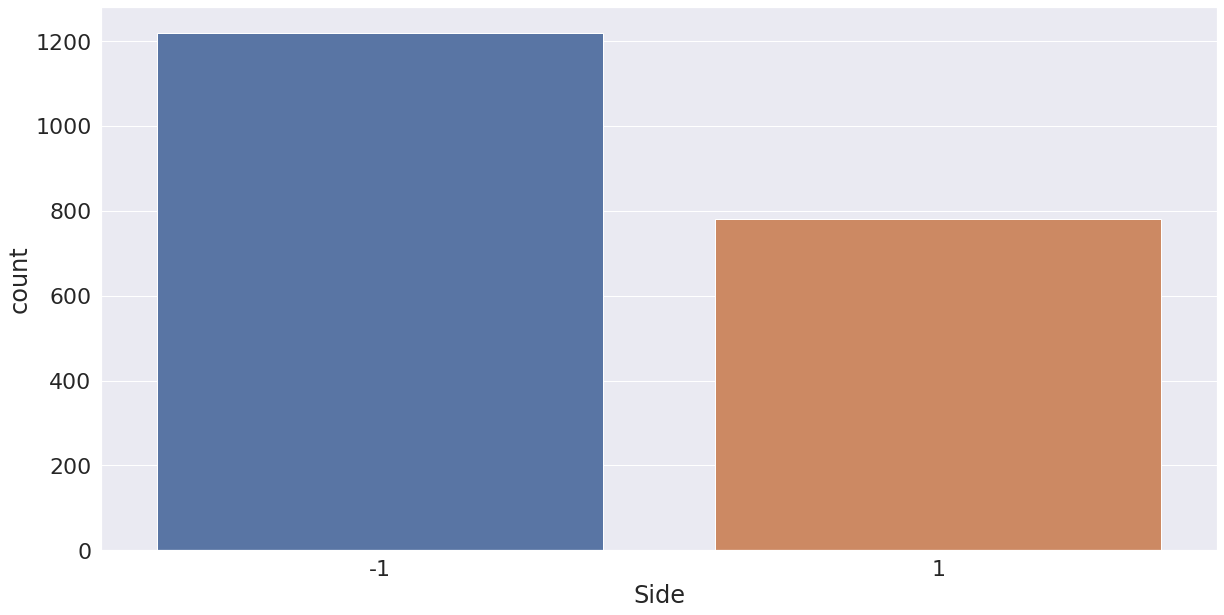

In [129]:
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.countplot( x='Side',data = swaps_dataset)

#### This plot tells that most people are selling base currency and buying the quote currency


### Removing extra columns which are not asked in the assignment

In [95]:
swaps_dataset.drop(labels=["amount0In", "amount0Out", "amount1In", "amount1Out"], axis=1, inplace=True)
swaps_dataset

,Timestamp,Pool_ID,Liquidity,Volume_USD,token0Price,token1Price,Side,Quantity_Base_Currency,Quantity_Quote_Currency
0,2021-06-23 02:15:08,0x580f2b6b8a36eb5dba84e9645914f6faf58e5fc7e47e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,94.343629,0.824586
1,2021-06-23 02:13:56,0xa746b0d55b835144a6a9381b7fb37c17ed965542b06e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,21.318526,0.186338
2,2021-06-23 02:13:45,0x7f2805a9e24e77811c6f4787a4ea2cb5ff948638d6be...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,8.063201,0.070479
3,2021-06-23 02:00:25,0x52c343401a44f387ef3d72faa985bfe1818adbb9dcd1...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,6.000000,0.052445
4,2021-06-23 01:56:04,0x873dd72de16d9ad3a79a9c3386c6214fdd0de7d31750...,7.804817e+07,6.633311e+09,114.074718,0.008766,1,96.835321,0.851490
...,...,...,...,...,...,...,...,...,...
1995,2021-06-21 01:07:35,0xe6b75220c58f0accff25c46d92220db324d96c93c555...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,3279.281945,30.075426
1996,2021-06-21 00:25:33,0xe43551021fb98d4e77ae71a15a4e7c7285dfa4b50c04...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,320.000000,2.939429
1997,2021-06-21 00:25:15,0x1763740ad9f493acb907bb1c3072428168dfa983963a...,7.804817e+07,6.633311e+09,114.074718,0.008766,1,5.000000,0.046212
1998,2021-06-21 00:22:16,0xcf0e3b94668ceb1db27da7fe65cd391125e32c42a02e...,7.804817e+07,6.633311e+09,114.074718,0.008766,-1,6.959273,0.063935


### Getting the mint dataset

In [86]:
mint_dataset = make_dataframe_mints_and_burns(mints,1)
mint_dataset

,Timestamp,Pool_ID,Base_Currency,Quote_Currency,Volume_USD,Liquidity,Sign
0,2021-06-23 02:11:00,0x12a1ea85b880da3acbc1293f27522a15bfa6e50ebe1c...,2.557598,0.022423,0.115896,86.469755,1
1,2021-06-22 22:46:21,0x6cdc2d75a0d929c455d26297a25fca27313225177bc5...,13.000000,0.113076,0.586776,429.280079,1
2,2021-06-22 21:24:03,0x1e7d65ec65b509d843d1c8f99735e5f7902b915c114d...,1329.322039,11.382782,59.533414,42374.893568,1
3,2021-06-22 21:20:25,0xc592de8acfed48d0e6f38a49cb0b6601ed26f3cc6f5a...,202.363850,1.726036,9.045226,6425.228847,1
4,2021-06-22 21:05:09,0x9813b03ec72a655ceecbee5b8fc94c48753529f1c636...,16.060743,0.136185,0.715778,512.474457,1
...,...,...,...,...,...,...,...
1995,2021-05-05 15:01:58,0x75c9fc81cad43eccd6bc59f989f18e9723e5db041ed1...,6.999996,0.091102,0.391626,609.057784,1
1996,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1
1997,2021-05-05 15:00:06,0x7e295e3522ec164b7996f2e52fbf182dc149cba3b3ba...,0.100000,0.001301,0.005595,8.686425,1
1998,2021-05-05 15:00:06,0x5fc3e7dcd7ffee8c1691ec250d709dca3657a772503f...,2.000000,0.026029,0.111894,173.728496,1


### Getting the Burn dataset

In [87]:
burn_dataset = make_dataframe_mints_and_burns(burns,-1)
burn_dataset

,Timestamp,Pool_ID,Base_Currency,Quote_Currency,Volume_USD,Liquidity,Sign
0,2021-06-23 02:11:39,0x58c8cf2547afeac2da515cf25c8e015ec2f41159d2b7...,94.341315,0.827102,4.275035,3187.132152,-1
1,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,134.567466,-1
2,2021-06-22 23:45:51,0xd43f9f7813b2bb765d43365f737a64d4238d17b276d9...,47.921783,0.418167,2.166483,1591.458845,-1
3,2021-06-22 23:45:51,0x7bc68b91c9cdd879917e3f08f4c6734fef0f518ee6ac...,11.026541,0.096214,0.498486,366.172166,-1
4,2021-06-22 22:48:39,0x9b0a6ec69bb39fc6df717c748c4a0a2f9fb792a86a51...,869.694426,7.562421,39.249100,28707.808653,-1
...,...,...,...,...,...,...,...
1995,2021-06-01 18:25:07,0xbc61780e5b98b2f0152431ffcaa634df49a6447c19da...,1.129432,0.011797,0.056006,60.671381,-1
1996,2021-06-01 18:02:32,0x42818c07041d0b31035ba7132bbd98351452f0b3000d...,9.997453,0.104420,0.495751,539.355536,-1
1997,2021-06-01 17:58:24,0xf32cfe52a20adb6912216db75503b7ac0e928d1ec373...,4.453028,0.046524,0.220848,240.342412,-1
1998,2021-06-01 17:55:31,0xd0f6a7ac6cbce9f6d1a7c6c864ce4c24849ae56f95b2...,142.310411,1.486833,7.057912,7679.604734,-1


### Combining Mint and Burn Dataset and sorting them according to time stamp

In [106]:
mint_burn_combo_dataset =  mint_dataset.append(burn_dataset)
mint_burn_combo_dataset.sort_values(by="Timestamp", inplace=True)
mint_burn_combo_dataset

,Timestamp,Pool_ID,Base_Currency,Quote_Currency,Volume_USD,Liquidity,Sign
1999,2021-05-05 15:00:06,0x48c2d80e6d2cf050a692eadc9ab88bd2b2c00c4e67ba...,1.009987,0.013145,0.056506,87.731434,1
1998,2021-05-05 15:00:06,0x5fc3e7dcd7ffee8c1691ec250d709dca3657a772503f...,2.000000,0.026029,0.111894,173.728496,1
1997,2021-05-05 15:00:06,0x7e295e3522ec164b7996f2e52fbf182dc149cba3b3ba...,0.100000,0.001301,0.005595,8.686425,1
1996,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1
997,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1
...,...,...,...,...,...,...,...
3,2021-06-22 23:45:51,0x7bc68b91c9cdd879917e3f08f4c6734fef0f518ee6ac...,11.026541,0.096214,0.498486,366.172166,-1
1,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,134.567466,-1
1000,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,134.567466,-1
0,2021-06-23 02:11:00,0x12a1ea85b880da3acbc1293f27522a15bfa6e50ebe1c...,2.557598,0.022423,0.115896,86.469755,1


### Giving the signs to liquidity. Negative sign means the tokens became less liquid and vice versa

In [107]:
mint_burn_combo_dataset['Liquidity'] = mint_burn_combo_dataset['Liquidity'] * mint_burn_combo_dataset['Sign']
mint_burn_combo_dataset

,Timestamp,Pool_ID,Base_Currency,Quote_Currency,Volume_USD,Liquidity,Sign
1999,2021-05-05 15:00:06,0x48c2d80e6d2cf050a692eadc9ab88bd2b2c00c4e67ba...,1.009987,0.013145,0.056506,87.731434,1
1998,2021-05-05 15:00:06,0x5fc3e7dcd7ffee8c1691ec250d709dca3657a772503f...,2.000000,0.026029,0.111894,173.728496,1
1997,2021-05-05 15:00:06,0x7e295e3522ec164b7996f2e52fbf182dc149cba3b3ba...,0.100000,0.001301,0.005595,8.686425,1
1996,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1
997,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1
...,...,...,...,...,...,...,...
3,2021-06-22 23:45:51,0x7bc68b91c9cdd879917e3f08f4c6734fef0f518ee6ac...,11.026541,0.096214,0.498486,-366.172166,-1
1,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,-134.567466,-1
1000,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,-134.567466,-1
0,2021-06-23 02:11:00,0x12a1ea85b880da3acbc1293f27522a15bfa6e50ebe1c...,2.557598,0.022423,0.115896,86.469755,1


### Finding cumulative liquidity

In [108]:
mint_burn_combo_dataset["Cumulative_Liquidity"] = np.cumsum(mint_burn_combo_dataset["Liquidity"])
mint_burn_combo_dataset

,Timestamp,Pool_ID,Base_Currency,Quote_Currency,Volume_USD,Liquidity,Sign,Cumulative_Liquidity
1999,2021-05-05 15:00:06,0x48c2d80e6d2cf050a692eadc9ab88bd2b2c00c4e67ba...,1.009987,0.013145,0.056506,87.731434,1,8.773143e+01
1998,2021-05-05 15:00:06,0x5fc3e7dcd7ffee8c1691ec250d709dca3657a772503f...,2.000000,0.026029,0.111894,173.728496,1,2.614599e+02
1997,2021-05-05 15:00:06,0x7e295e3522ec164b7996f2e52fbf182dc149cba3b3ba...,0.100000,0.001301,0.005595,8.686425,1,2.701464e+02
1996,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1,4.345896e+05
997,2021-05-05 15:00:06,0xfbb7637fd3b4d5dcbed359618d0697938c9669eaefb8...,5000.000000,65.073151,279.734240,434319.422144,1,8.689090e+05
...,...,...,...,...,...,...,...,...
3,2021-06-22 23:45:51,0x7bc68b91c9cdd879917e3f08f4c6734fef0f518ee6ac...,11.026541,0.096214,0.498486,-366.172166,-1,3.154418e+07
1,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,-134.567466,-1,3.154405e+07
1000,2021-06-23 01:58:19,0xa4f7e68b0d60f7a5a9dc4524a4e4922856d999ec356a...,3.993093,0.035008,0.180946,-134.567466,-1,3.154391e+07
0,2021-06-23 02:11:00,0x12a1ea85b880da3acbc1293f27522a15bfa6e50ebe1c...,2.557598,0.022423,0.115896,86.469755,1,3.154400e+07


### Time series plot of Cumulative liquidity

<AxesSubplot:xlabel='Timestamp', ylabel='Cumulative_Liquidity'>

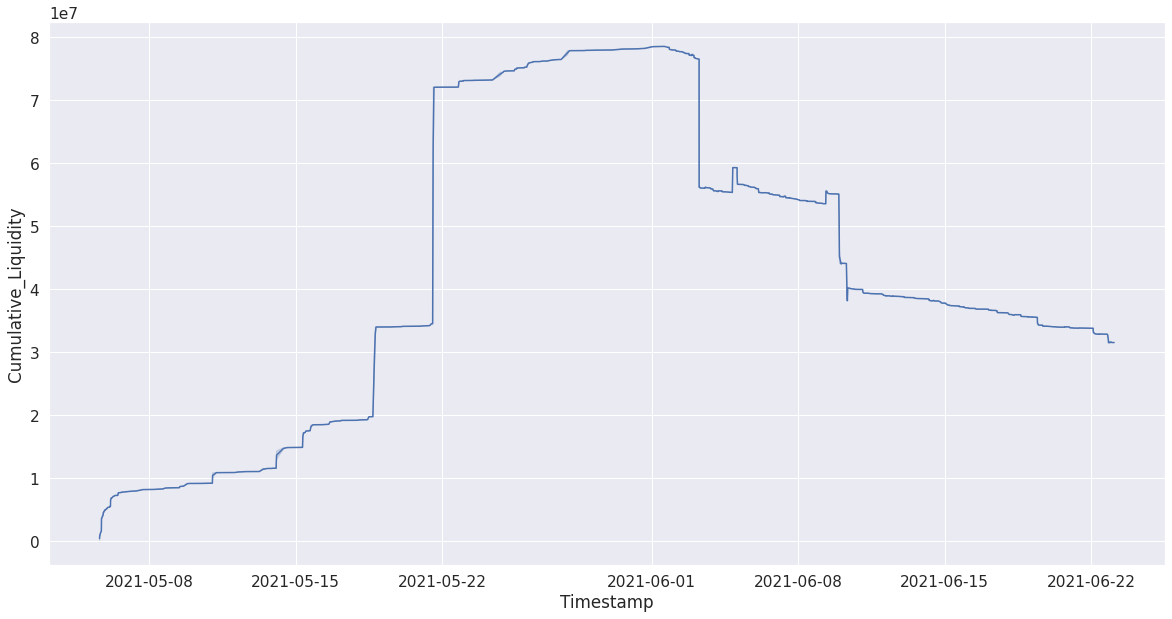

In [118]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.lineplot( x=mint_burn_combo_dataset["Timestamp"],y = mint_burn_combo_dataset["Cumulative_Liquidity"] )

#### The cumulative liquidity first increases then decreases. The decrease is due to burn events while increase is due to mint events

### Getting prices of tokens

In [119]:
# GraphQL query for price of token 0.
query0 = gql(
    """
{
    tokenDayDatas(orderBy: date, 
                  orderDirection: desc,
                  where: {
                        token: "0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"
                    }
    ) {
        date
        priceUSD
    }
}
"""
)

# GraphQL query for price of token 1.
query1 = gql(
    """
{
    tokenDayDatas(orderBy: date, 
                  orderDirection: desc,
                  where: {
                        token: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"
                    }
    ) {
        date
        priceUSD
    }
}
"""
)


In [120]:
price0 = client.execute(query0)
price1 = client.execute(query1)

In [121]:
price0

{'tokenDayDatas': [{'date': 1624320000,
   'priceUSD': '16.31967870612860624398475340918188'},
  {'date': 1624233600, 'priceUSD': '15.89343988783823909284708924842526'},
  {'date': 1624147200, 'priceUSD': '20.70418039900633165540027149891165'},
  {'date': 1624060800, 'priceUSD': '19.88328170760083632079891841598341'},
  {'date': 1623974400, 'priceUSD': '20.33703545613082596661428414012598'},
  {'date': 1623888000, 'priceUSD': '22.10974730861315263832463353699395'},
  {'date': 1623801600, 'priceUSD': '21.68744619474387558384126944286784'},
  {'date': 1623715200, 'priceUSD': '23.53319159419594592520112791897279'},
  {'date': 1623628800, 'priceUSD': '24.03249110131395137139347425379858'},
  {'date': 1623542400, 'priceUSD': '23.21178857528135503318527477399035'},
  {'date': 1623456000, 'priceUSD': '21.21832632036901097465825618006575'},
  {'date': 1623369600, 'priceUSD': '21.82095198153480016702327511244137'},
  {'date': 1623283200, 'priceUSD': '23.52755644289907895260542443975578'},
  {'d

In [122]:
price1

{'tokenDayDatas': [{'date': 1624320000,
   'priceUSD': '1880.775936434236043328375352819921'},
  {'date': 1624233600, 'priceUSD': '1887.509898931465755559469894433275'},
  {'date': 1624147200, 'priceUSD': '2238.740081793423624778092650838548'},
  {'date': 1624060800, 'priceUSD': '2170.697313018871632811153407073446'},
  {'date': 1623974400, 'priceUSD': '2232.264123138657039169689152266622'},
  {'date': 1623888000, 'priceUSD': '2370.14964738419384745544414920246'},
  {'date': 1623801600, 'priceUSD': '2360.79148703821581578531820222863'},
  {'date': 1623715200, 'priceUSD': '2550.969925690528779257093695018291'},
  {'date': 1623628800, 'priceUSD': '2575.477463319915354240551767655633'},
  {'date': 1623542400, 'priceUSD': '2506.324987451199869801900575136066'},
  {'date': 1623456000, 'priceUSD': '2373.015897798206585245883789043019'},
  {'date': 1623369600, 'priceUSD': '2349.615257098239767786288671791152'},
  {'date': 1623283200, 'priceUSD': '2470.354998709753343583230116106008'},
  {'dat

### A function to parse the Price Data

In [123]:
def Parse_Price_Data(price0, price1):
    price = {"Timestamp" : [], "Price_UNI" : [], "Price_WETH" : []}
    for entry0, entry1 in zip(price0["tokenDayDatas"], price1["tokenDayDatas"]):
        price["Timestamp"] += [datetime.fromtimestamp(int(entry0["date"]))]
        price["Price_UNI"] += [float(entry0["priceUSD"])]
        price["Price_WETH"] += [float(entry1["priceUSD"])]
    
    return pd.DataFrame.from_dict(price)

### Parsed Dataset for Prices

In [125]:
price_dataset = Parse_Price_Data(price0, price1)
price_dataset

,Timestamp,Price_UNI,Price_WETH
0,2021-06-22 05:30:00,16.319679,1880.775936
1,2021-06-21 05:30:00,15.893440,1887.509899
2,2021-06-20 05:30:00,20.704180,2238.740082
3,2021-06-19 05:30:00,19.883282,2170.697313
4,2021-06-18 05:30:00,20.337035,2232.264123
...,...,...,...
95,2021-03-19 05:30:00,33.078801,1807.604600
96,2021-03-18 05:30:00,30.160393,1778.850987
97,2021-03-17 05:30:00,31.416789,1823.507179
98,2021-03-16 05:30:00,29.725730,1800.959099


### Time Series plot of UNI Price

<AxesSubplot:xlabel='Timestamp', ylabel='Price_UNI'>

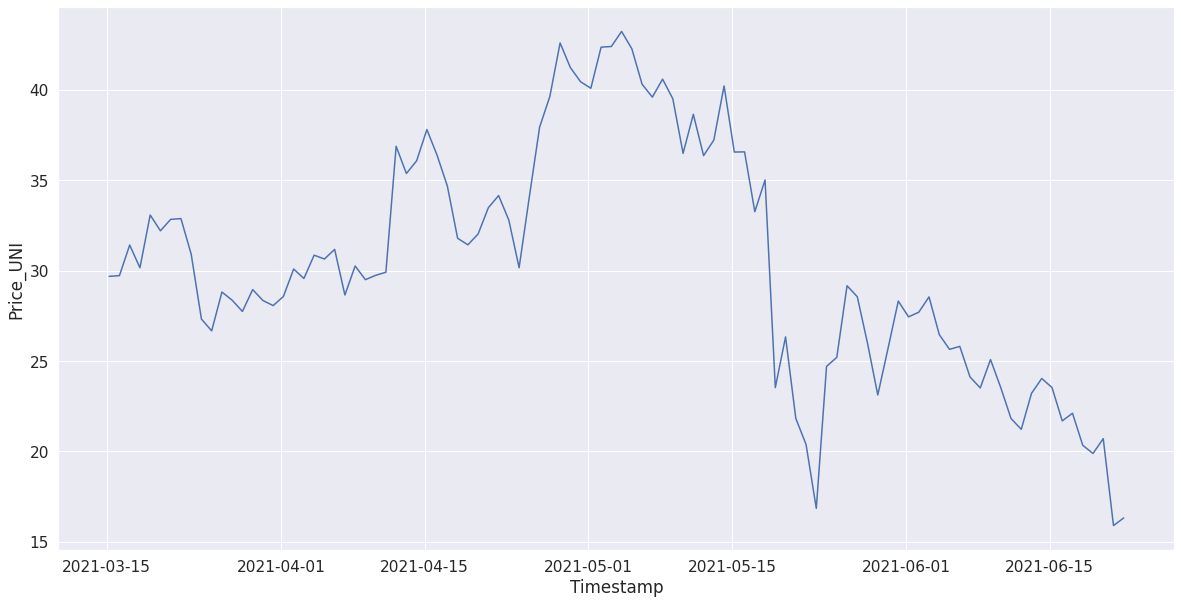

In [126]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.lineplot( x=price_dataset["Timestamp"],y = price_dataset["Price_UNI"])

### Time Series plot of WETH Price

<AxesSubplot:xlabel='Timestamp', ylabel='Price_WETH'>

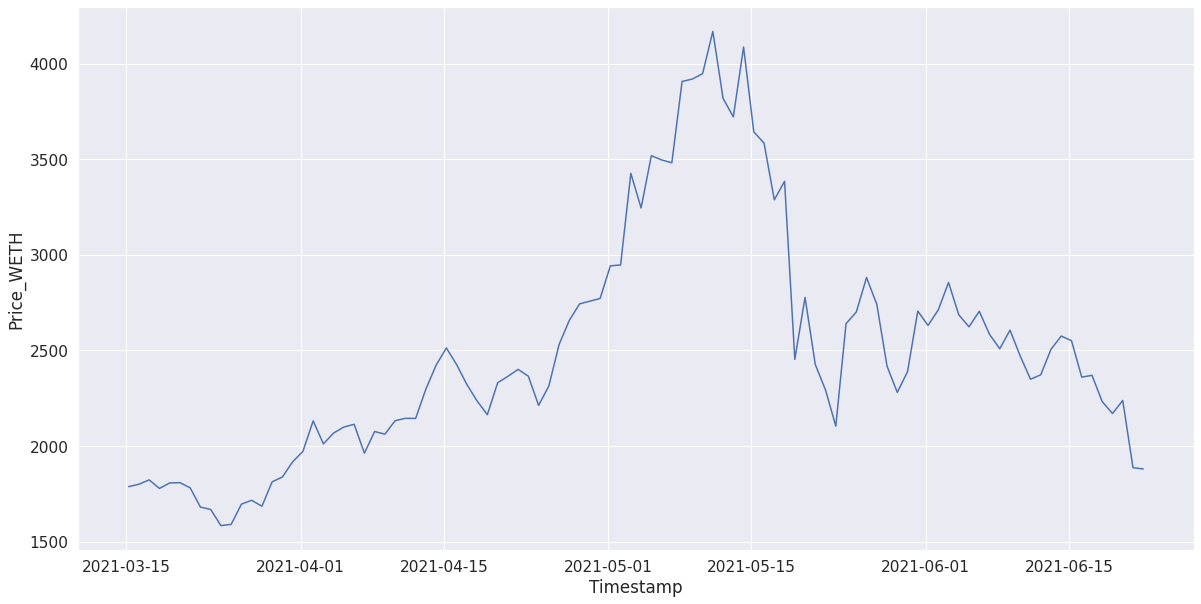

In [127]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.lineplot( x=price_dataset["Timestamp"],y = price_dataset["Price_WETH"])

### Plotting the Prices for last 10 days

<AxesSubplot:xlabel='Timestamp', ylabel='value'>

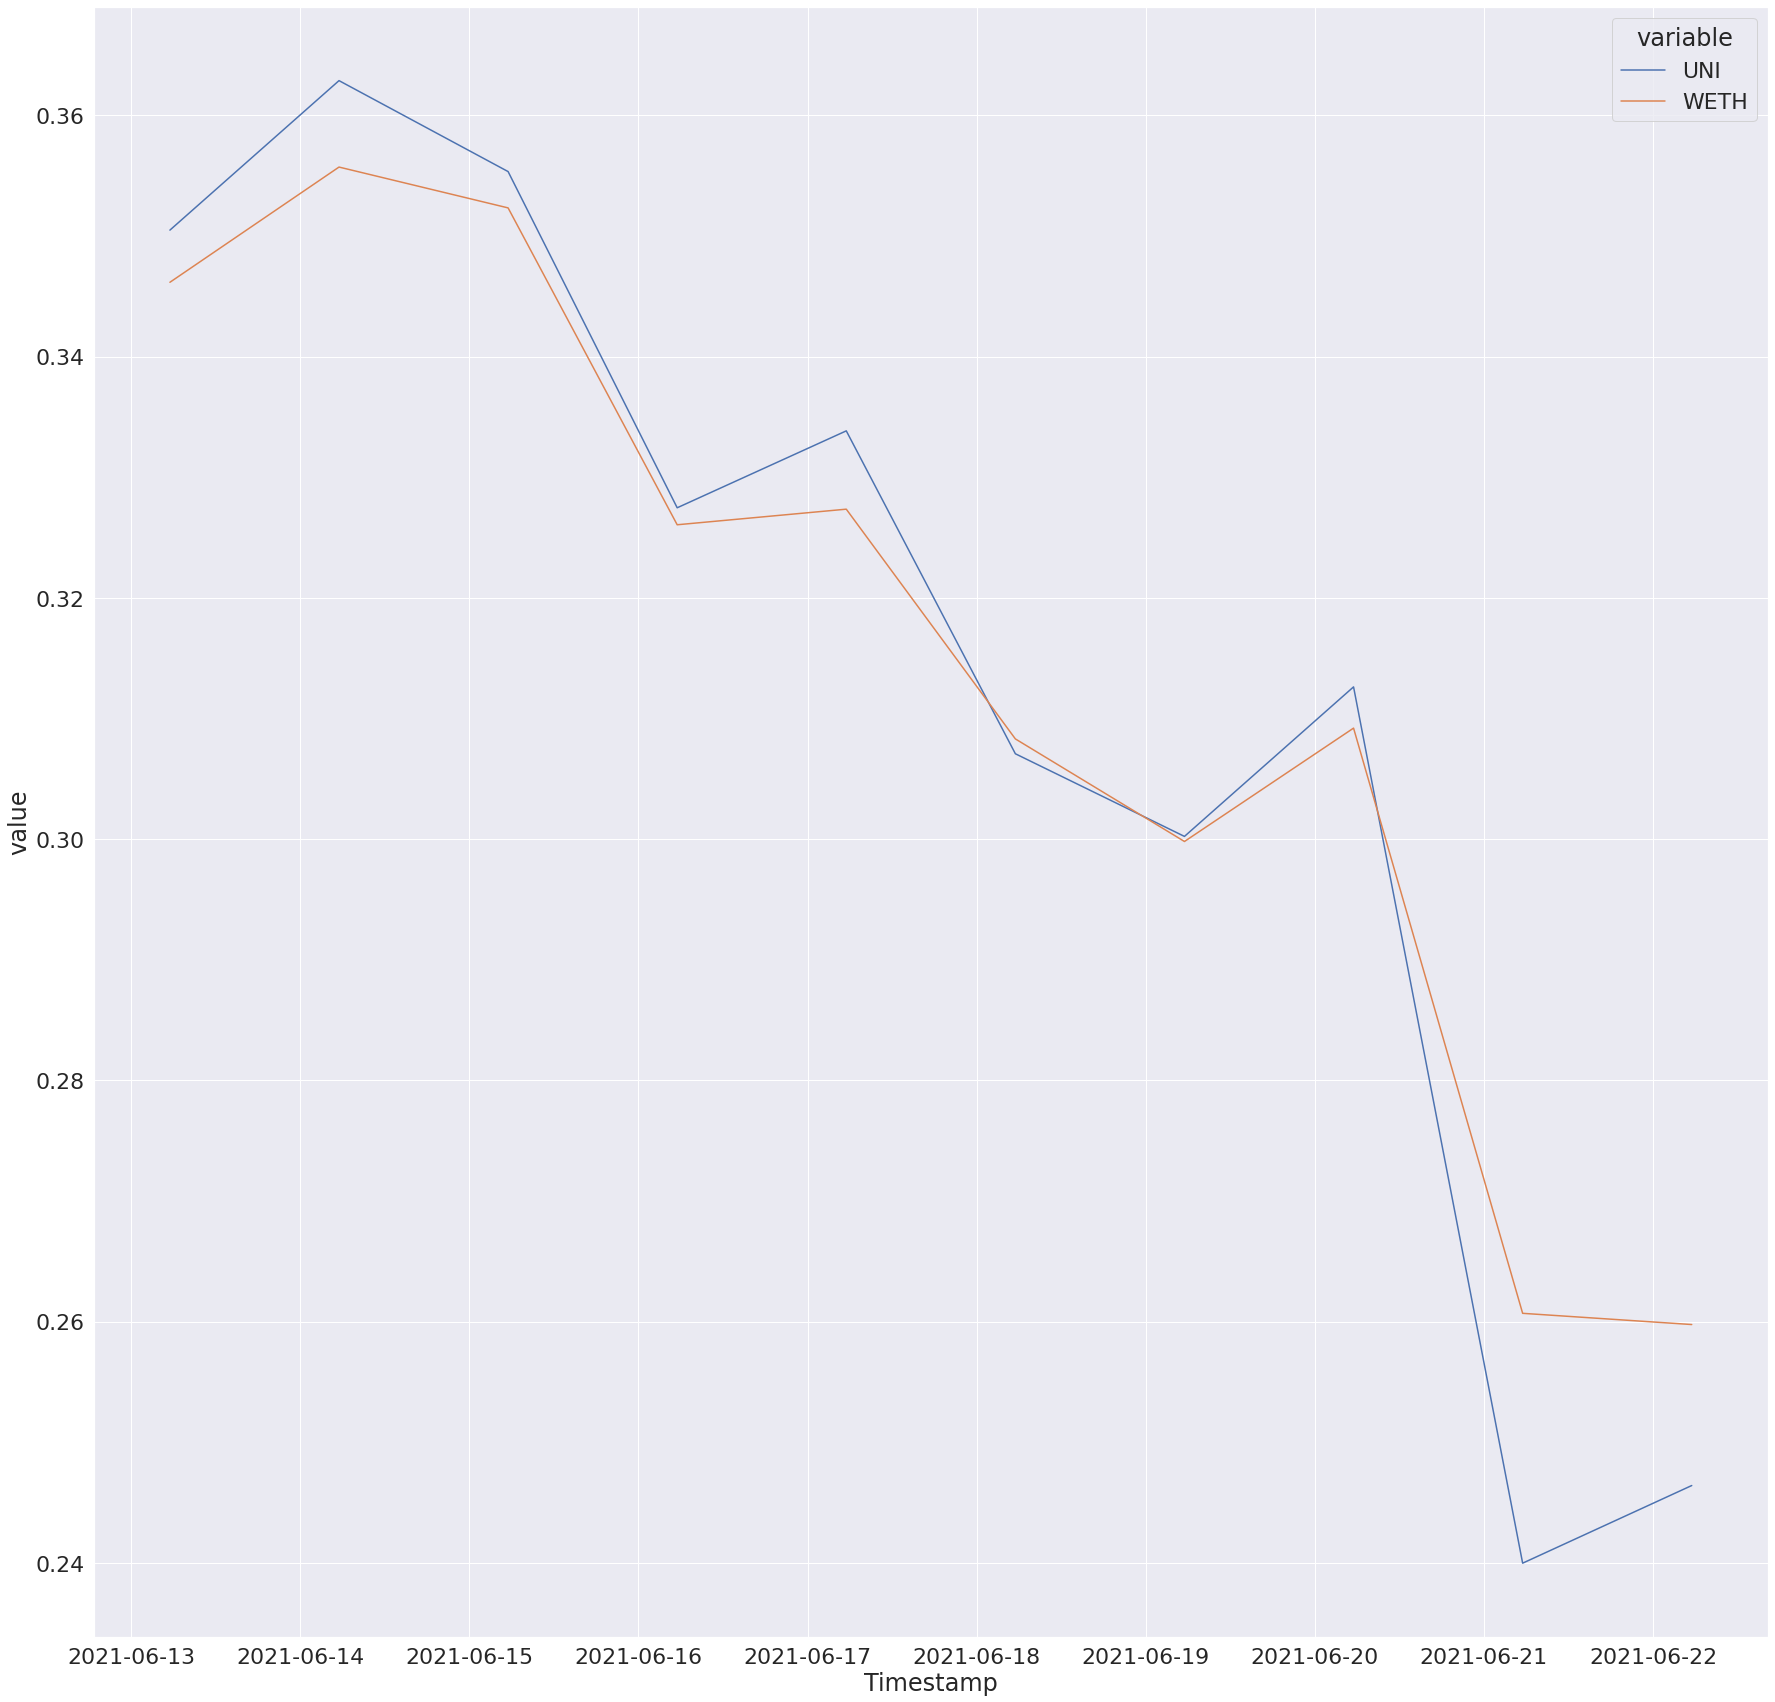

In [143]:
price = np.vstack((price_dataset["Price_UNI"][:10].to_numpy(), 
                   price_dataset["Price_WETH"][:10].to_numpy()))

# Normalize the data for better visualization.
price = normalize(price, axis = 1)


df = pd.DataFrame({
    'Timestamp': price_dataset["Timestamp"][:10], 
    'UNI': price[0],
    'WETH': price[1],
    })
plt.figure(figsize = (30,30))
sns.lineplot(x='Timestamp', y='value', hue='variable', 
             data=pd.melt(df, ['Timestamp']))

### From the plots we can see that the price of UNI and WETH have gone down too much  recently